## Observations and Insights 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df1 = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
df1.head()
df1.to_csv("mouseid.csv")

In [38]:
# Checking the number of mice
df1["Mouse ID"].nunique()

249

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = df1[df1.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df1[df1["Mouse ID"] != "g989"]

In [42]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

dfmean = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
dfmedian = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
dfvar = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
dfsd = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
dfSEM = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

dfsum = pd.DataFrame({"Mean": dfmean, "Median": dfmedian, "Variance": dfvar, 
                      "Std Dev.": dfsd, "Std Error": dfSEM})
dfsum

,Mean,Median,Variance,Std Dev.,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df["Tumor Volume (mm3)"].agg(["mean", "median", "var",  "std", "sem"])

mean      50.435293
median    48.933454
var       79.462907
std        8.914197
sem        0.205591
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

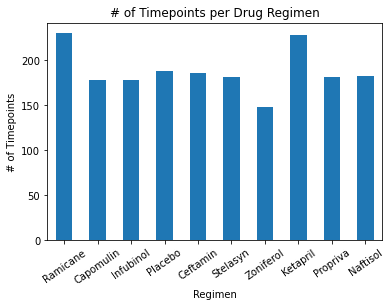

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen = df["Drug Regimen"].unique().tolist()
timepoints = df.groupby(["Drug Regimen"])["Timepoint"].count().tolist()
dfbar = pd.DataFrame({"Regimen": regimen, "Timepoints": timepoints})
dfbar.plot.bar("Regimen", "Timepoints", legend = False, 
               ylabel = "# of Timepoints", title = "# of Timepoints per Drug Regimen", rot = 35);

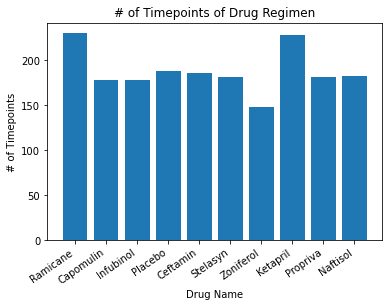

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen = df["Drug Regimen"].unique().tolist()
timepoints = df.groupby(["Drug Regimen"])["Timepoint"].count().tolist()
plt.xticks(rotation = 35, ha = "right")
plt.bar(regimen, timepoints)
plt.xlabel("Drug Name")
plt.ylabel("# of Timepoints")
plt.title("# of Timepoints of Drug Regimen");

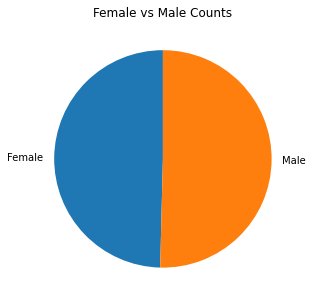

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female = df.groupby("Sex")["Mouse ID"].nunique()[0]
male = df.groupby("Sex")["Mouse ID"].nunique()[1]
dfpie = pd.DataFrame({'Count': [female, male]},
                  index=["Female", "Male"])
dfpie.plot.pie(y='Count', figsize=(5, 5), startangle = 90, title = "Female vs Male Counts", legend = False, ylabel = "");

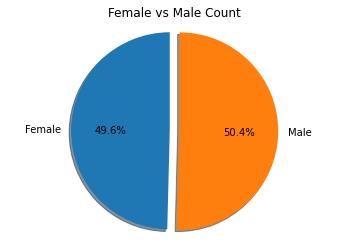

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [female, male]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Female vs Male Count");

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

subsetdf = df[(df["Drug Regimen"] == "Capomulin") | (df["Drug Regimen"] == "Ramicane") | 
              (df["Drug Regimen"] == "Infubinol") | (df["Drug Regimen"] == "Ceftamin")]
subsetdf
# Start by getting the last (greatest) timepoint for each mouse
subsetdf = subsetdf.groupby("Mouse ID").last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
subsetdf

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
regiments = subsetdf["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumovol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = subsetdf["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile is: 37.1877438025
The upper quartile is: 59.930261755
The interquartile range is: 22.742517952499995
The the median is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
